In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import plotly.graph_objs as go
import pandas_ta as ta
import talib

In [23]:
df = yf.download("IBM", start='2015-01-01', end='2020-12-31')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,102.338928,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,100.728630,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,98.556328,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,97.912170,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,100.040306,4431693


In [25]:
# Calculating SMA
df['short_SMA'] = talib.SMA(df['Close'], timeperiod = 20)
df['long_SMA'] = talib.SMA(df['Close'], timeperiod = 60)

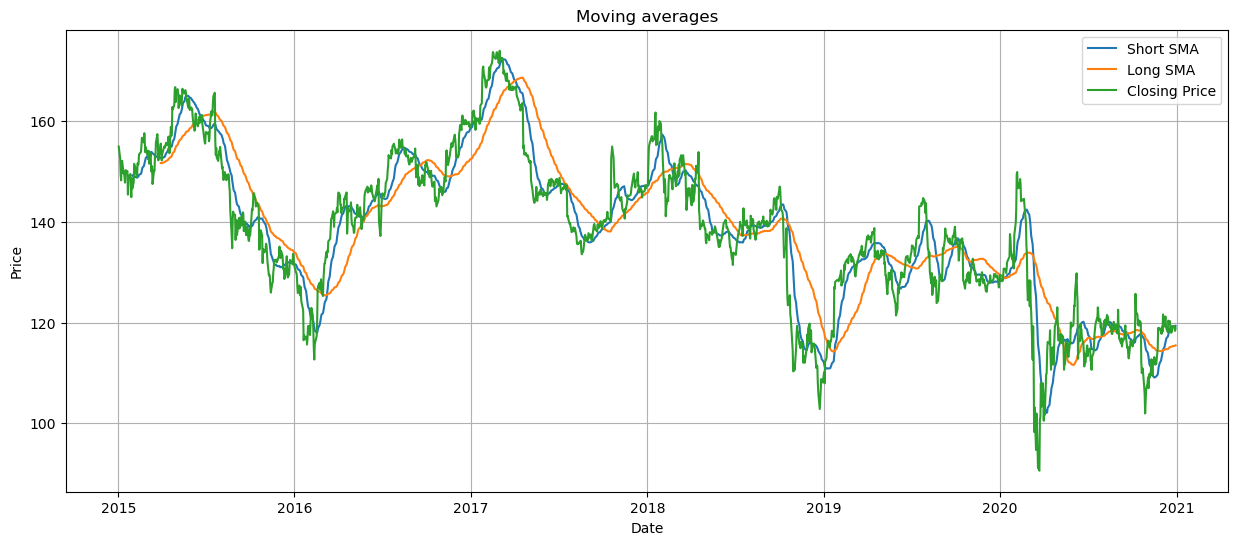

In [27]:
plt.figure(figsize=(15, 6))

plt.plot(df['short_SMA'], label = 'Short SMA')
plt.plot(df['long_SMA'], label = 'Long SMA')
plt.plot(df['Close'], label = 'Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages')
plt.legend()
plt.grid(True)

plt.show()

In [33]:
# Calculating EMA
df['short_EMA'] = talib.EMA(df['Close'], timeperiod = 12)
df['long_EMA'] = talib.EMA(df['Close'], timeperiod = 26)

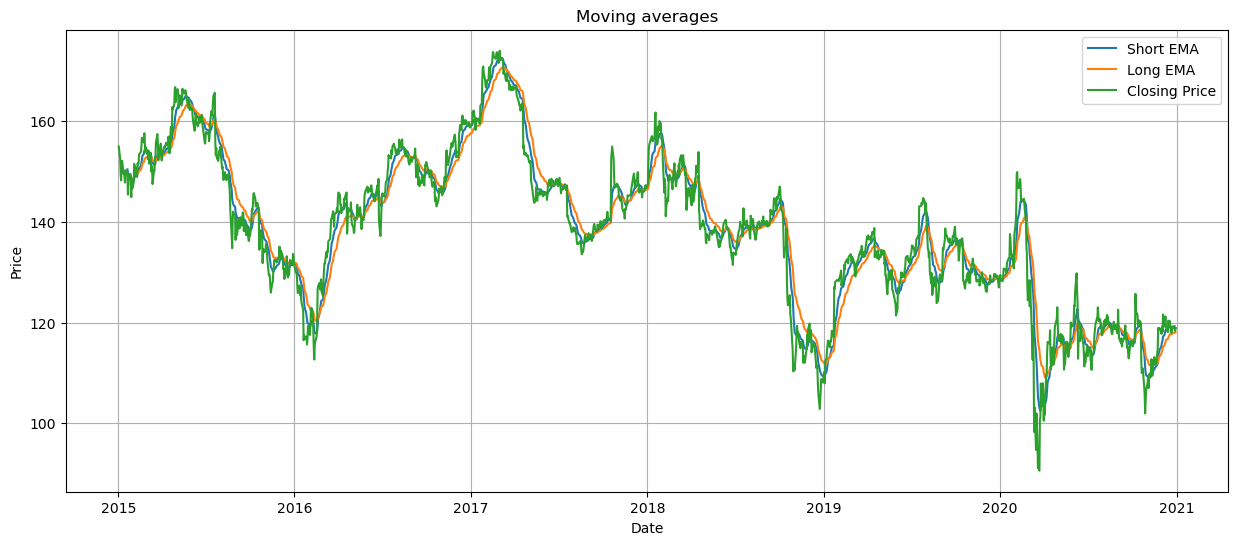

In [35]:
plt.figure(figsize=(15, 6))

plt.plot(df['short_EMA'], label = 'Short EMA')
plt.plot(df['long_EMA'], label = 'Long EMA')
plt.plot(df['Close'], label = 'Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages')
plt.legend()
plt.grid(True)

plt.show()

In [37]:
# Calculating ADX
df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod = 14)

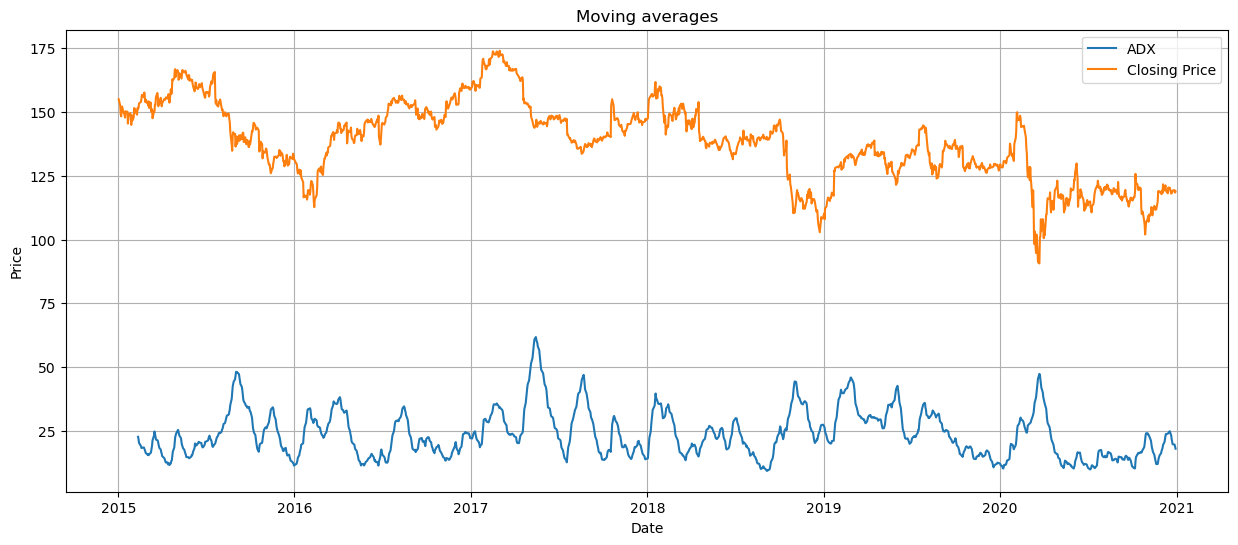

In [39]:
plt.figure(figsize=(15, 6))

plt.plot(df['ADX'], label = 'ADX')
plt.plot(df['Close'], label = 'Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages')
plt.legend()
plt.grid(True)

plt.show()

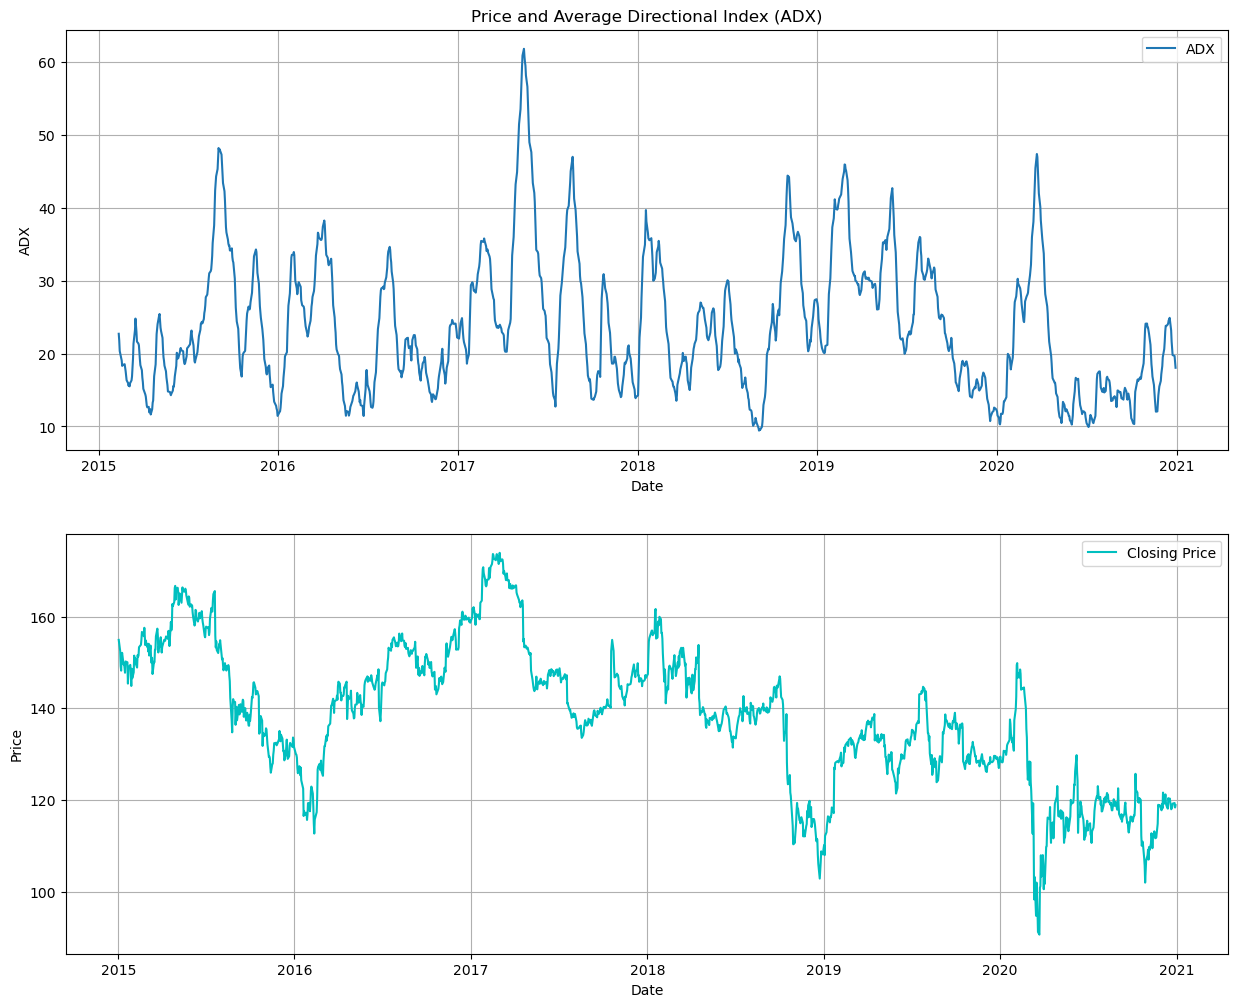

In [55]:
# Create two subplots using `subplots`
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))  # Adjust figsize as needed

# Plot ADX on the first subplot (ax1)
ax1.plot(df['ADX'], label='ADX')
ax1.set_xlabel('Date')
ax1.set_ylabel('ADX')
ax1.set_title('Price and Average Directional Index (ADX)')
ax1.legend()
ax1.grid(True)

# Plot Closing Price on the second subplot (ax2)
ax2.plot(df['Close'], label='Closing Price', color = 'c')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.legend()
ax2.grid(True)


plt.show()

In [49]:
# Calculating ADX
df['RSI'] = talib.RSI(df['Close'], timeperiod = 14)

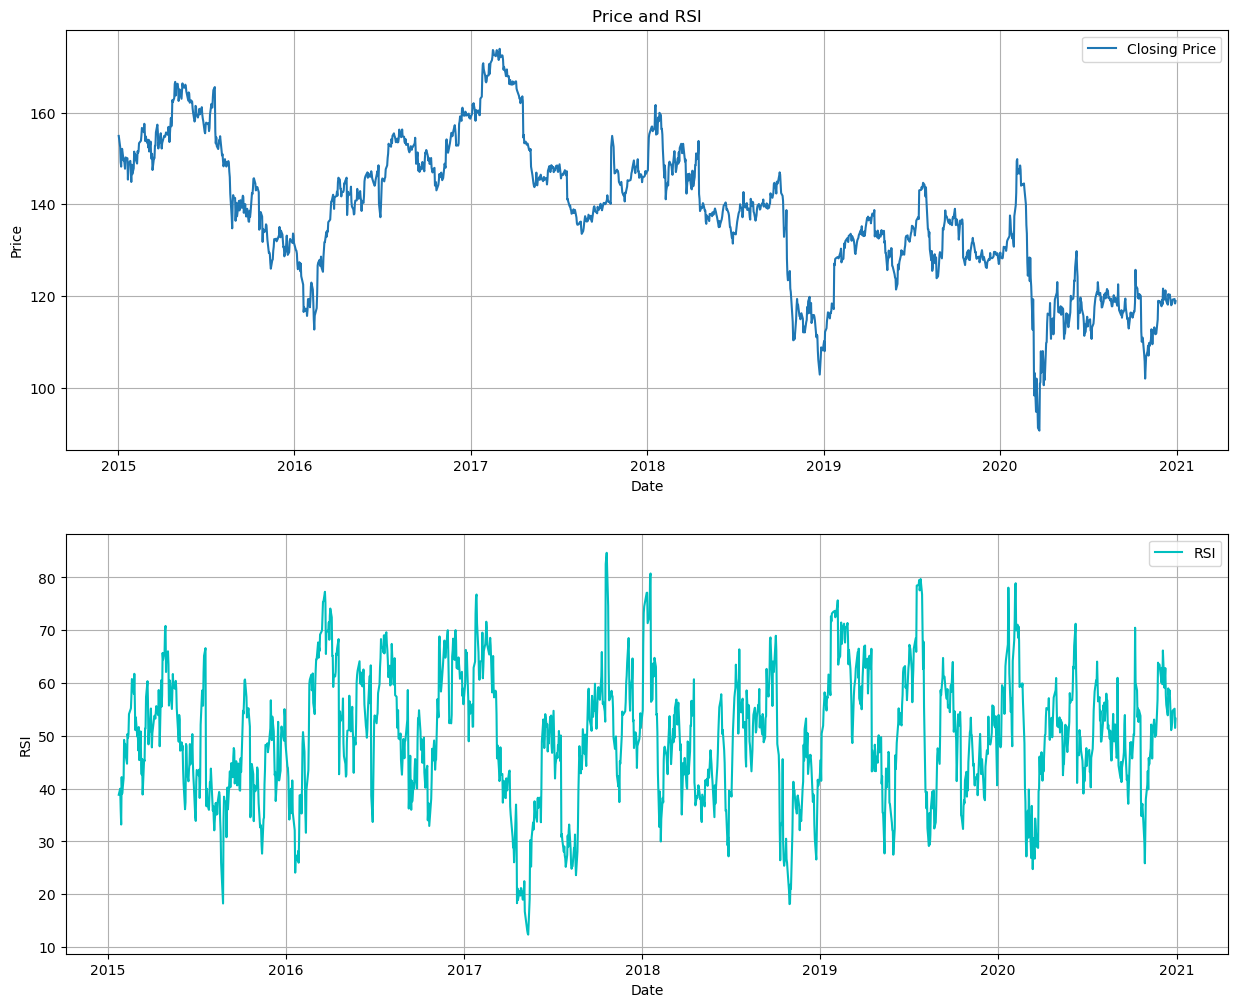

In [61]:
# Create two subplots using `subplots`
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))  # Adjust figsize as needed

# Plot ADX on the first subplot (ax1)
ax1.plot(df['Close'], label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Price and RSI')
ax1.legend()
ax1.grid(True)

# Plot Closing Price on the second subplot (ax2)
ax2.plot(df['RSI'], label='RSI', color = 'c')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid(True)


plt.show()

In [78]:
# Bollinger Bands
upper, mid, low = talib.BBANDS(df['Close'], nbdevup = 2, nbdevdn = 2, timeperiod = 20)

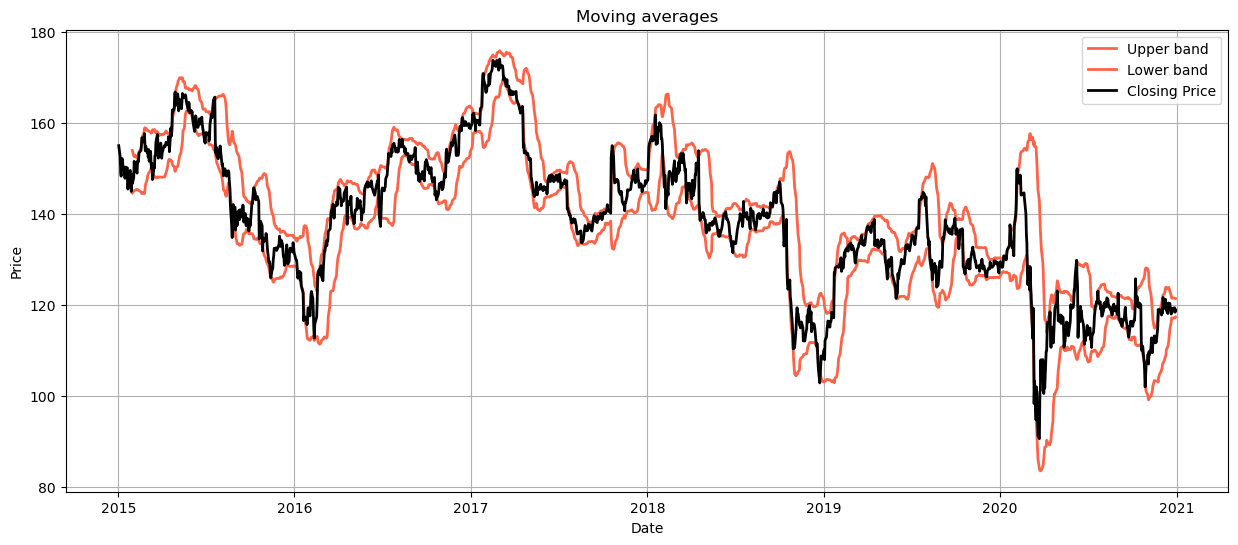

In [92]:
plt.figure(figsize=(15, 6))

plt.plot(upper, label = 'Upper band', lw = 2, c = 'tomato')
#plt.plot(mid, label = 'Middle band', lw = 2)
plt.plot(low, label = 'Lower band', lw = 2, c = 'tomato')
plt.plot(df['Close'], label = 'Closing Price', c = 'k', lw = 2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages')
plt.legend()
plt.grid(True)

plt.show()

## Trading Signals

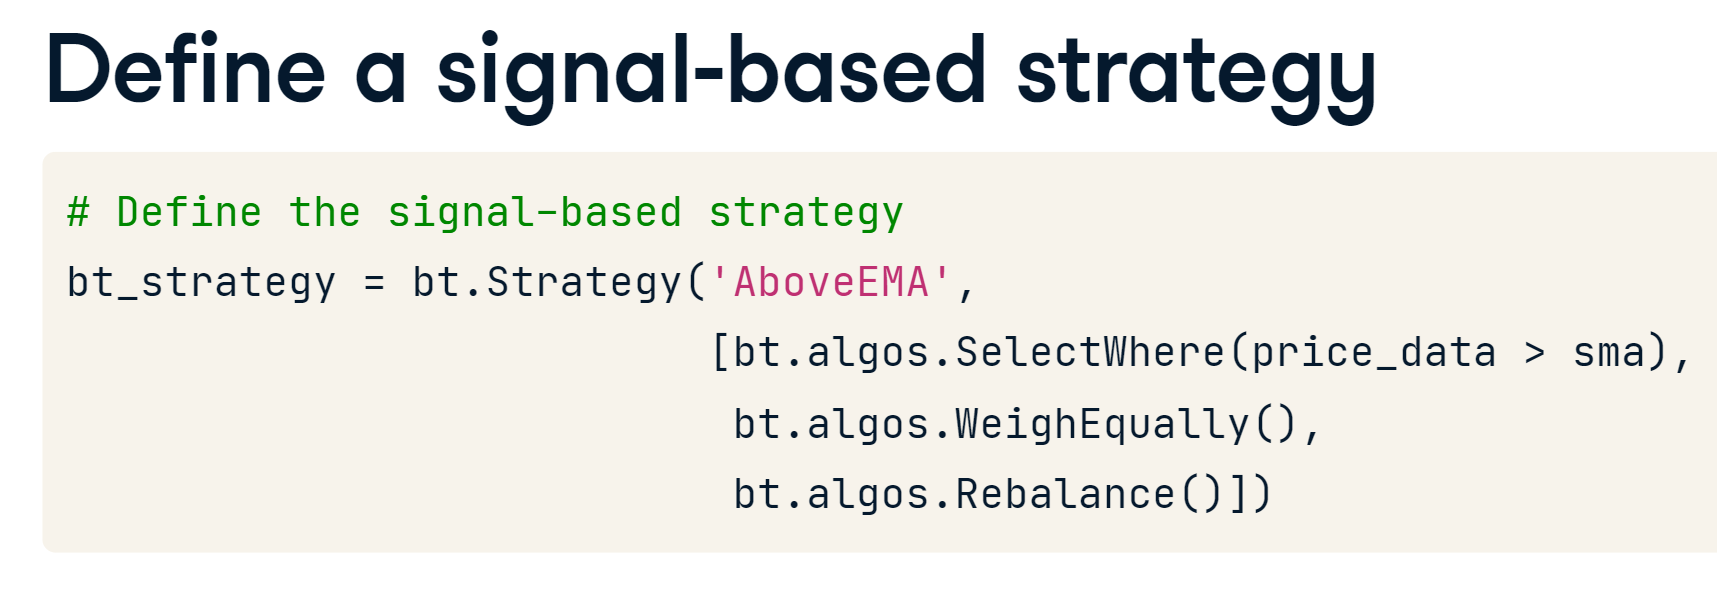

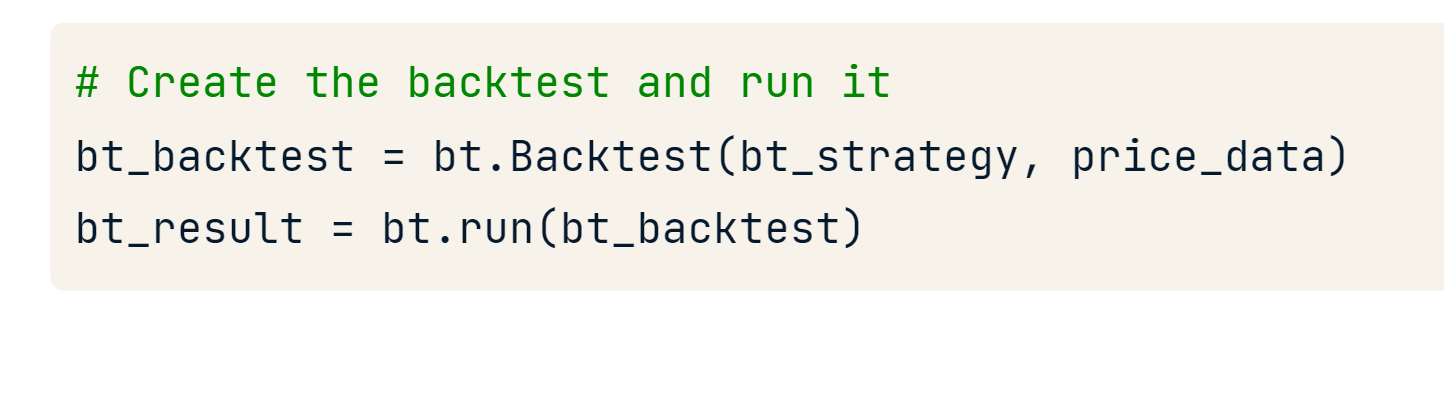

In [114]:
sma = df.rolling(20).mean()
# Define the strategy
bt_strategy = bt.Strategy('AboveSMA', 
                          [bt.algos.SelectWhere(df > df['short_SMA']),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, df)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: unhashable type: 'Series'

In [ ]:
# Calculate the EMA
ema['Close'] = talib.EMA(price_data['Close'], timeperiod=20)

# Define the strategy
bt_strategy = bt.Strategy('AboveEMA',
                          [bt.algos.SelectWhere(price_data > ema),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

In [130]:
# Get the price data
price_data = bt.get("IBM", start='2015-01-01', end='2020-12-31')
# Calculate the SMA
sma = price_data.rolling(20).mean()


[*********************100%%**********************]  1 of 1 completed


100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


<Axes: title={'center': 'Backtest result'}>

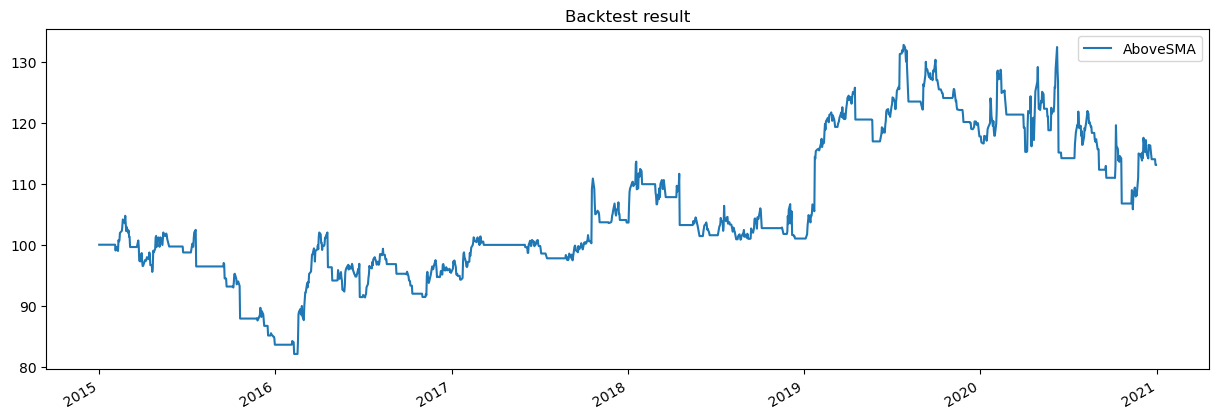

In [132]:
# Define the strategy
bt_strategy = bt.Strategy('AboveSMA', 
                          [bt.algos.SelectWhere(price_data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')

In [240]:
price_data = df['Close'].to_frame()
EMA_short = talib.SMA(df['Close'], timeperiod=20).to_frame()
EMA_long = talib.SMA(df['Close'], timeperiod=100).to_frame()

In [242]:
# create signal
signals = EMA_long.copy()
signals[EMA_long.isnull()] = 0


signals[EMA_short > EMA_long] = 1
signals[EMA_short < EMA_long] = -1


<Axes: xlabel='Date'>

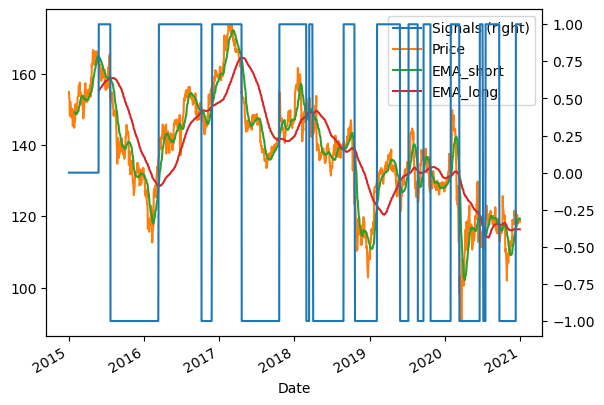

In [244]:
# Plot
combined_df = bt.merge(signals, price_data, EMA_short, EMA_long)
combined_df.columns = ['Signals', 'Price', 'EMA_short', 'EMA_long']

combined_df.plot(secondary_y =['Signals'])

In [246]:
signals.rename(columns = {0:'Close'}, inplace = True)

100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


<Axes: title={'center': 'SMA_crossover'}>

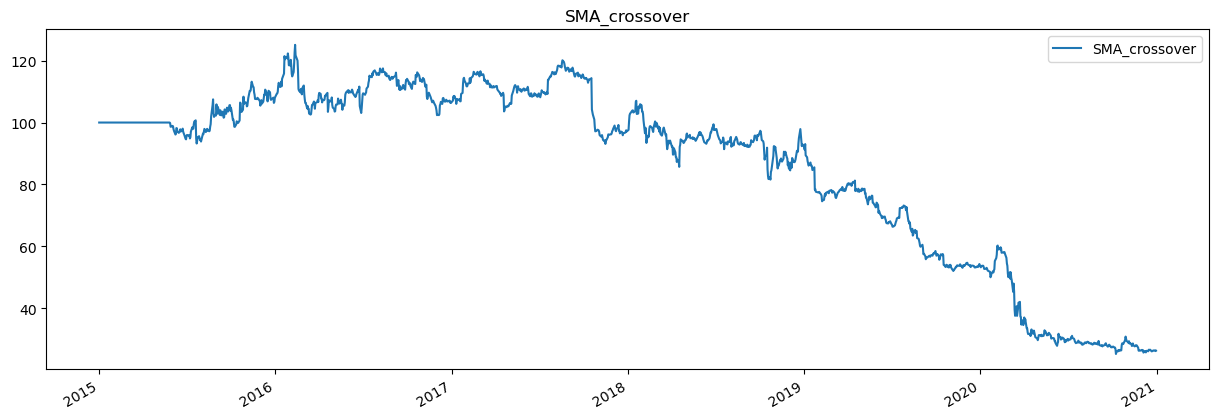

In [248]:
# Create Strategy and backtest
bt_strategy = bt.Strategy('SMA_crossover',
                        [bt.algos.WeighTarget(signals),
                        bt.algos.Rebalance()])

bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_results = bt.run(bt_backtest)

bt_results.plot(title = 'SMA_crossover')

In [252]:
resInfo = bt_results.stats

In [260]:
print('Daily Return: %.4f'% resInfo.loc['daily_mean'])
print('Monthly Return: %.4f'% resInfo.loc['monthly_mean'])
print('Yearly Return: %.4f'% resInfo.loc['yearly_mean'])

Daily Return: -0.1924
Monthly Return: -0.1965
Yearly Return: -0.2161


C:\Users\admin\AppData\Local\Temp\ipykernel_10564\2467675889.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Daily Return: %.4f'% resInfo.loc['daily_mean'])
C:\Users\admin\AppData\Local\Temp\ipykernel_10564\2467675889.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Monthly Return: %.4f'% resInfo.loc['monthly_mean'])
C:\Users\admin\AppData\Local\Temp\ipykernel_10564\2467675889.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Yearly Return: %.4f'% resInfo.loc['yearly_mean'])


Text(0.5, 0.98, 'weekly Return Histogram Matrix')

<Figure size 640x480 with 0 Axes>

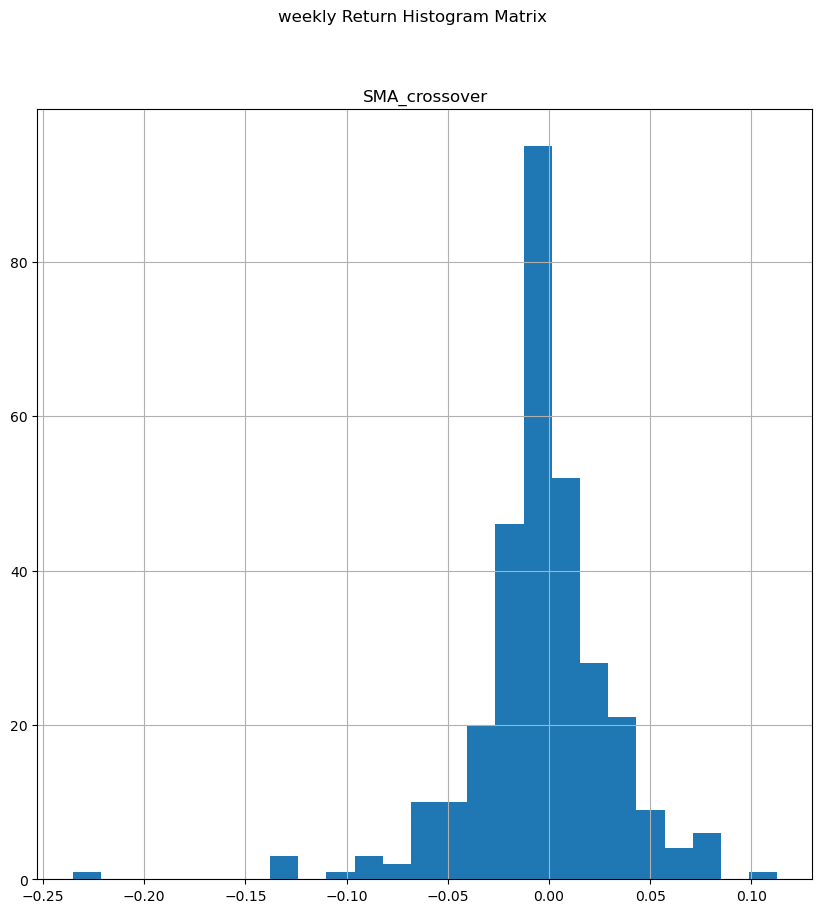

In [264]:
bt_results.plot_histograms(bins= 25, freq = 'W')

Compare returns between strategies

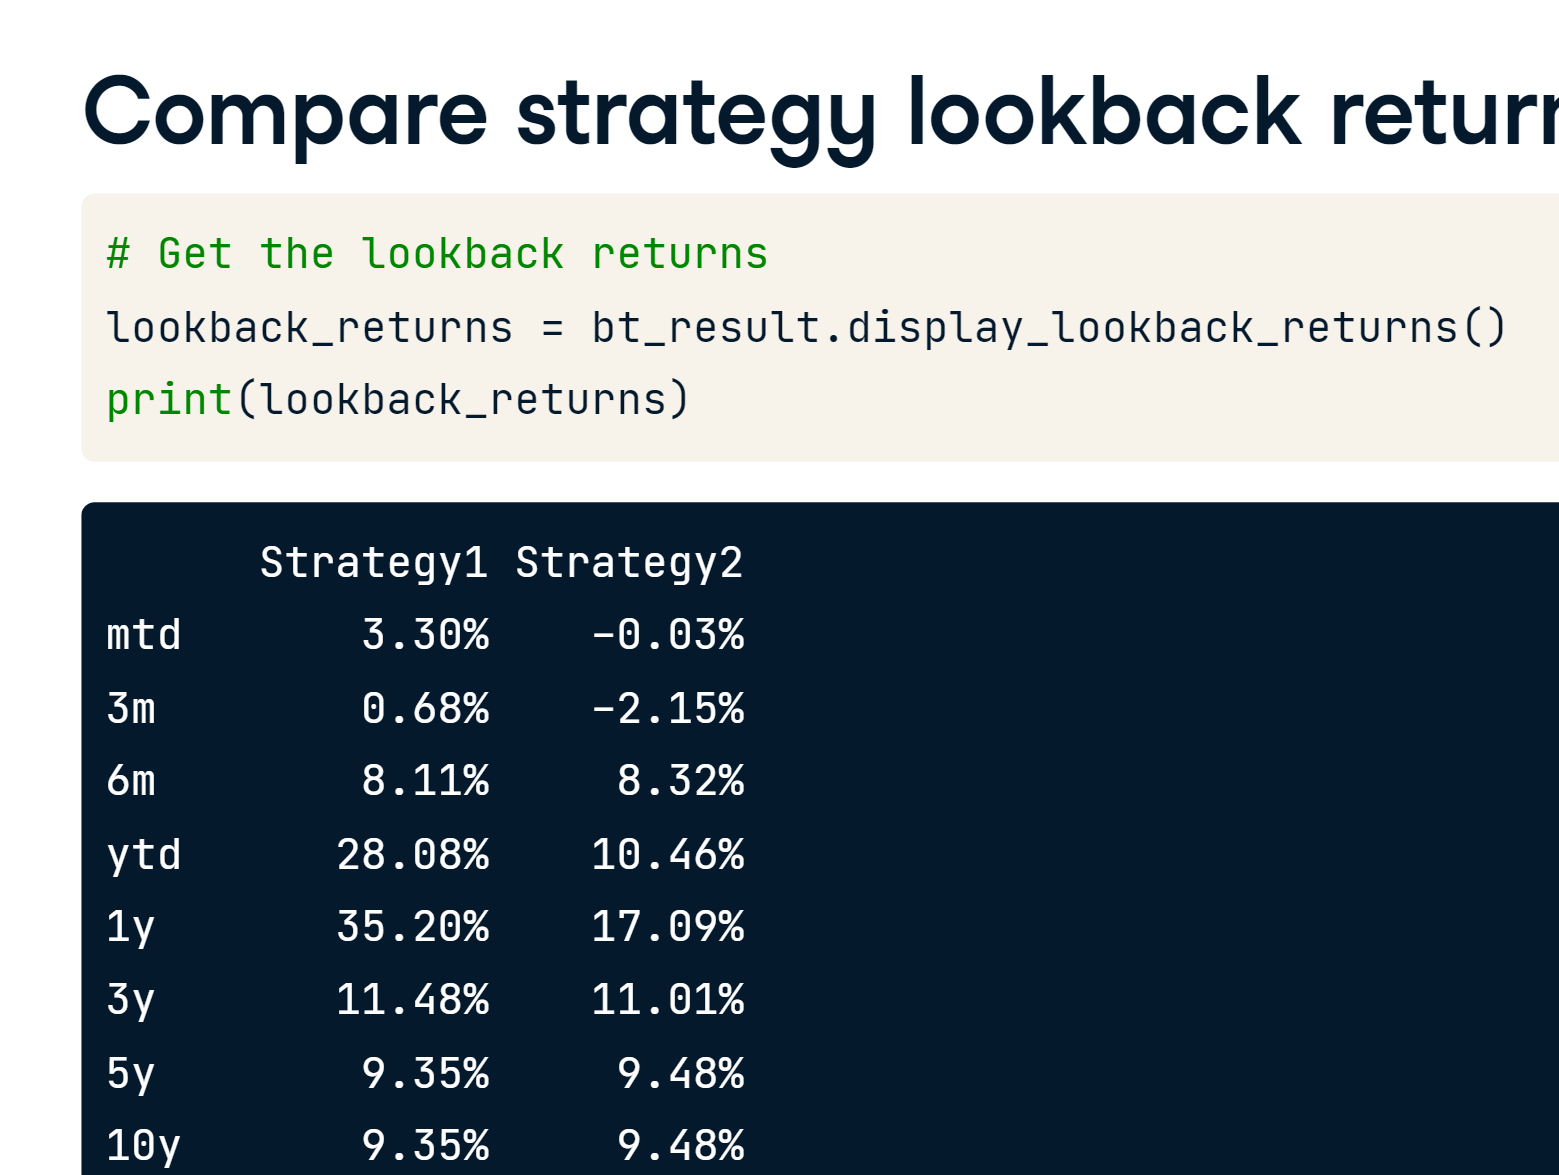

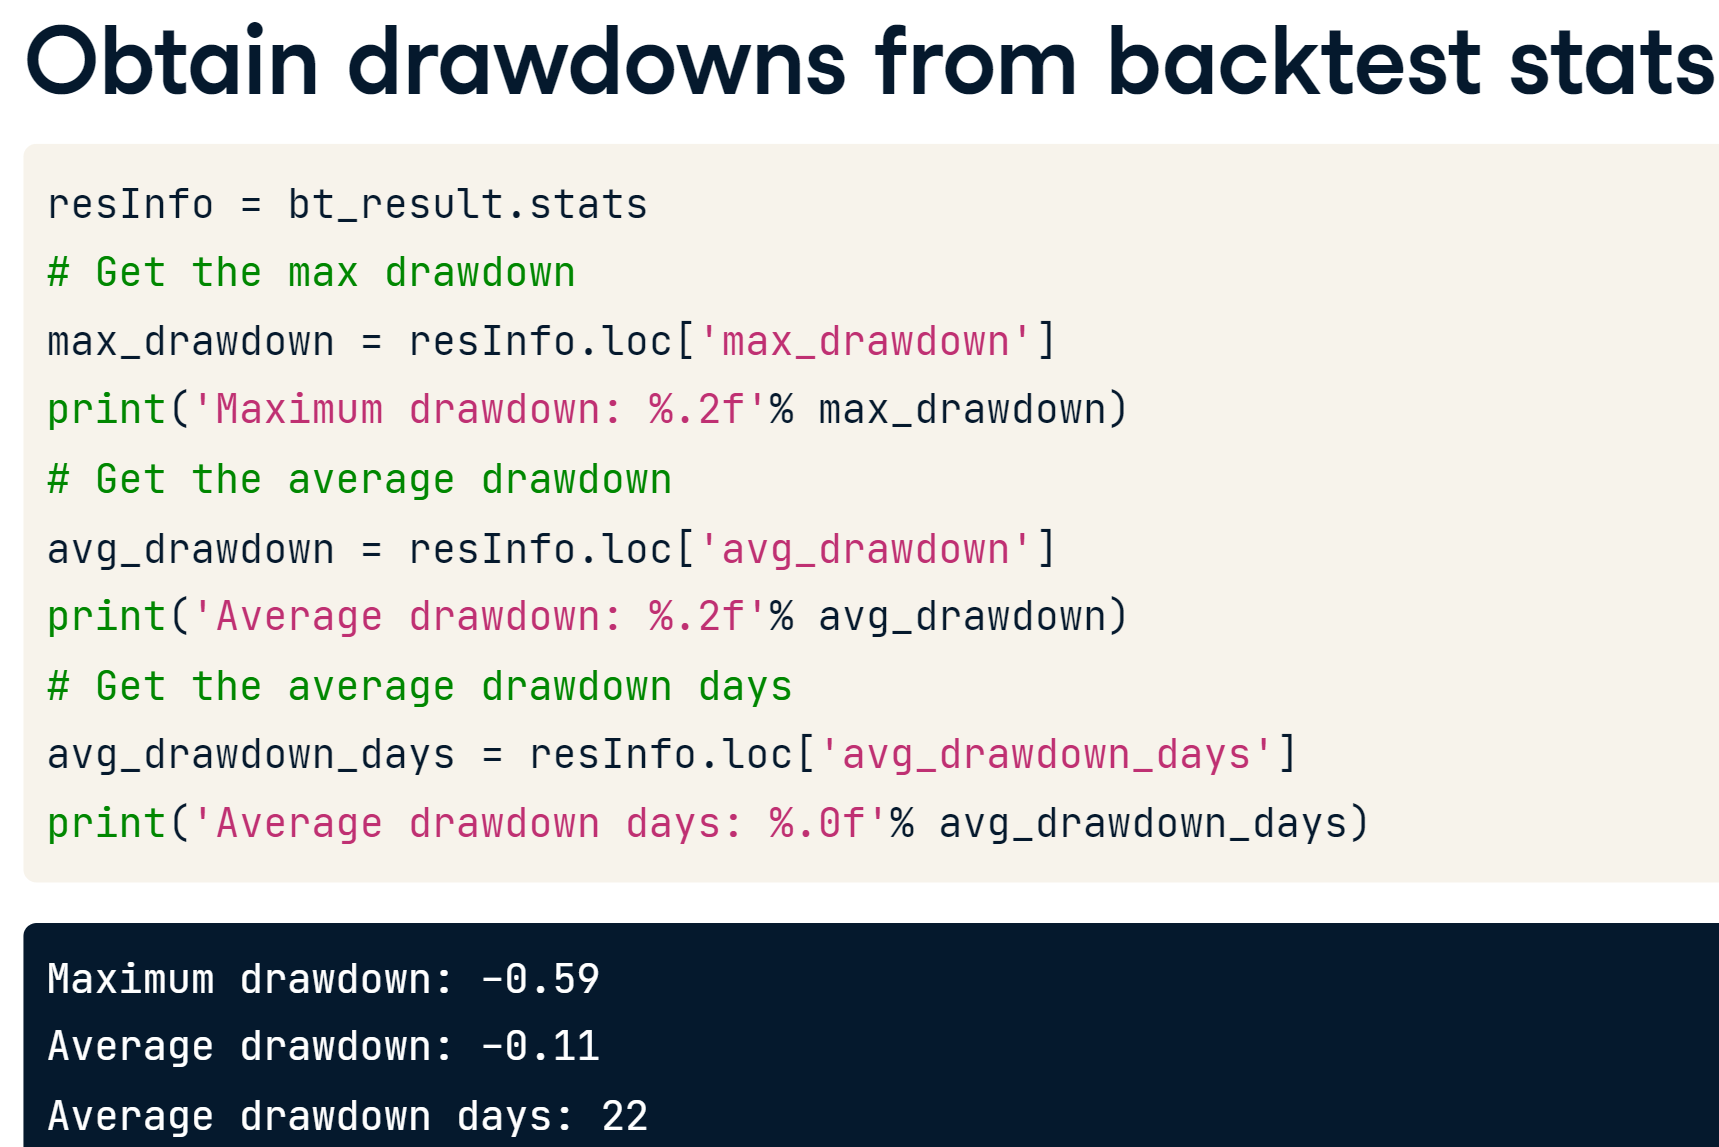

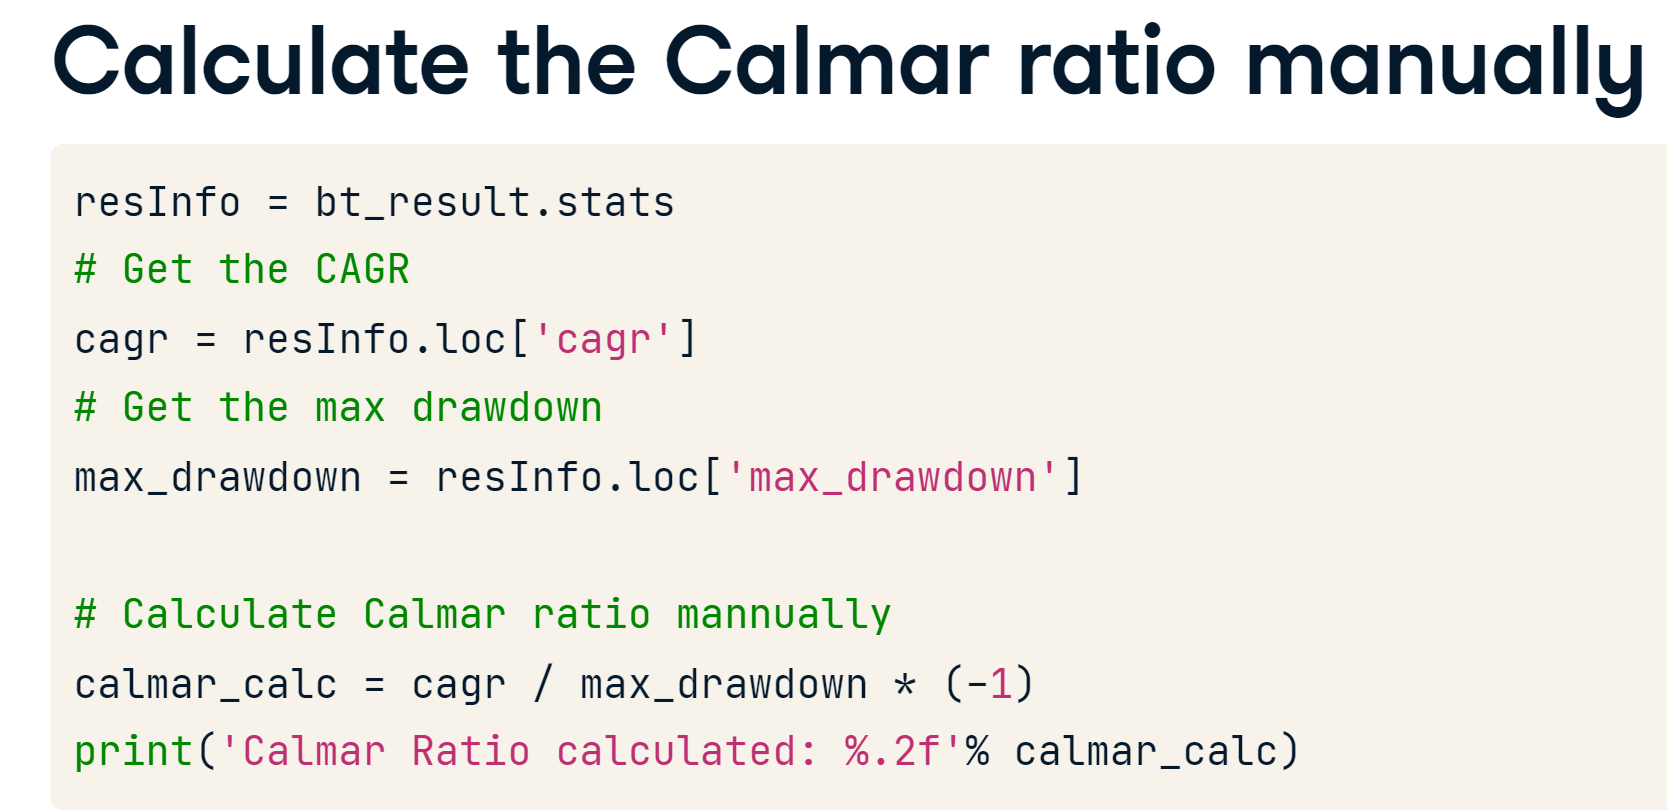

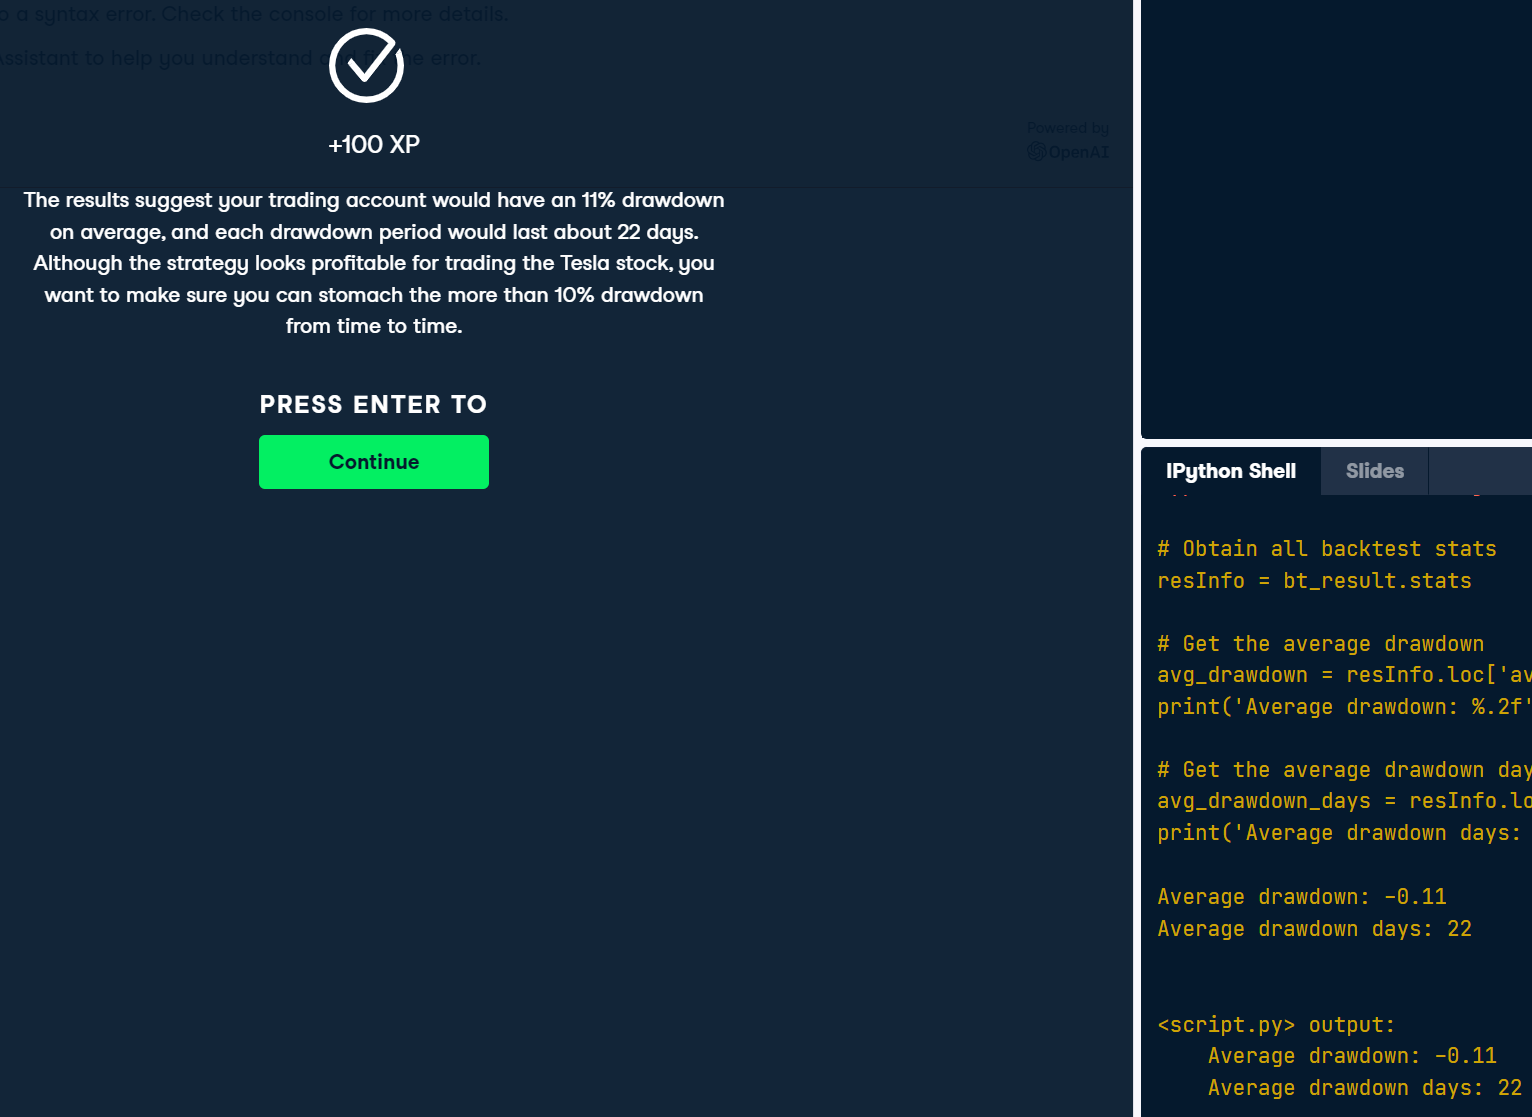

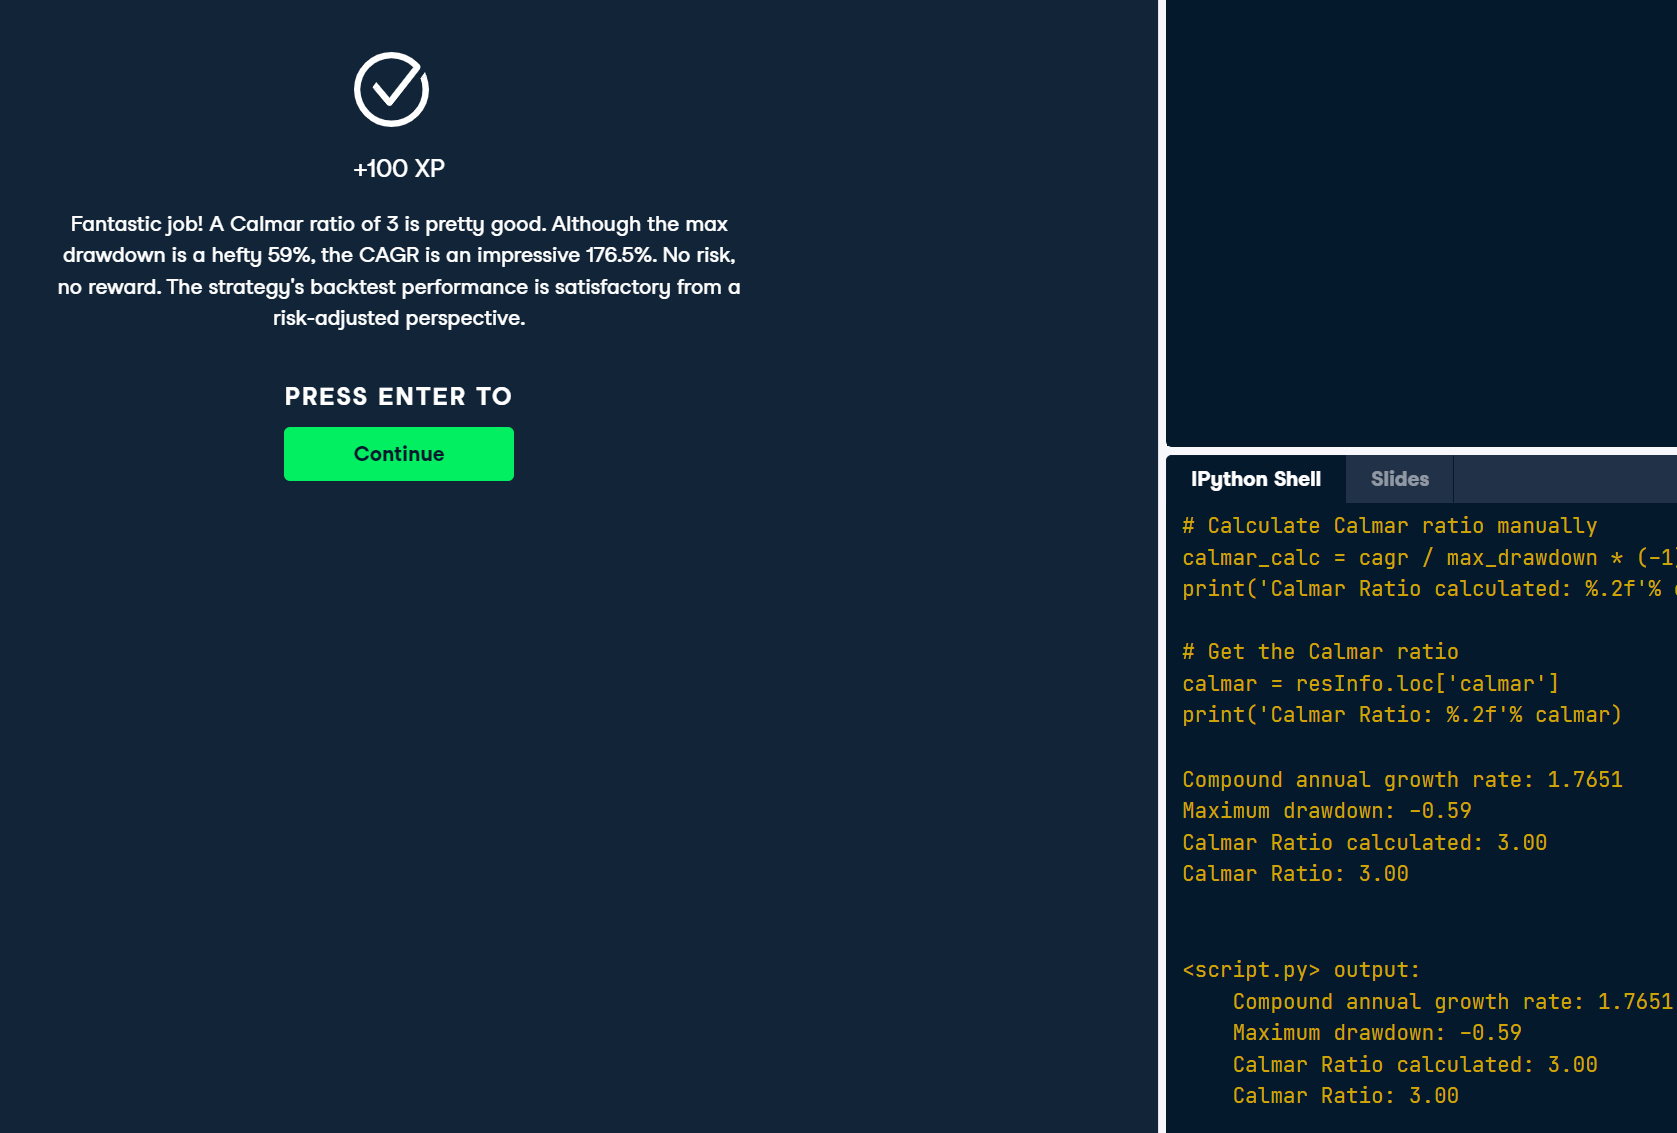

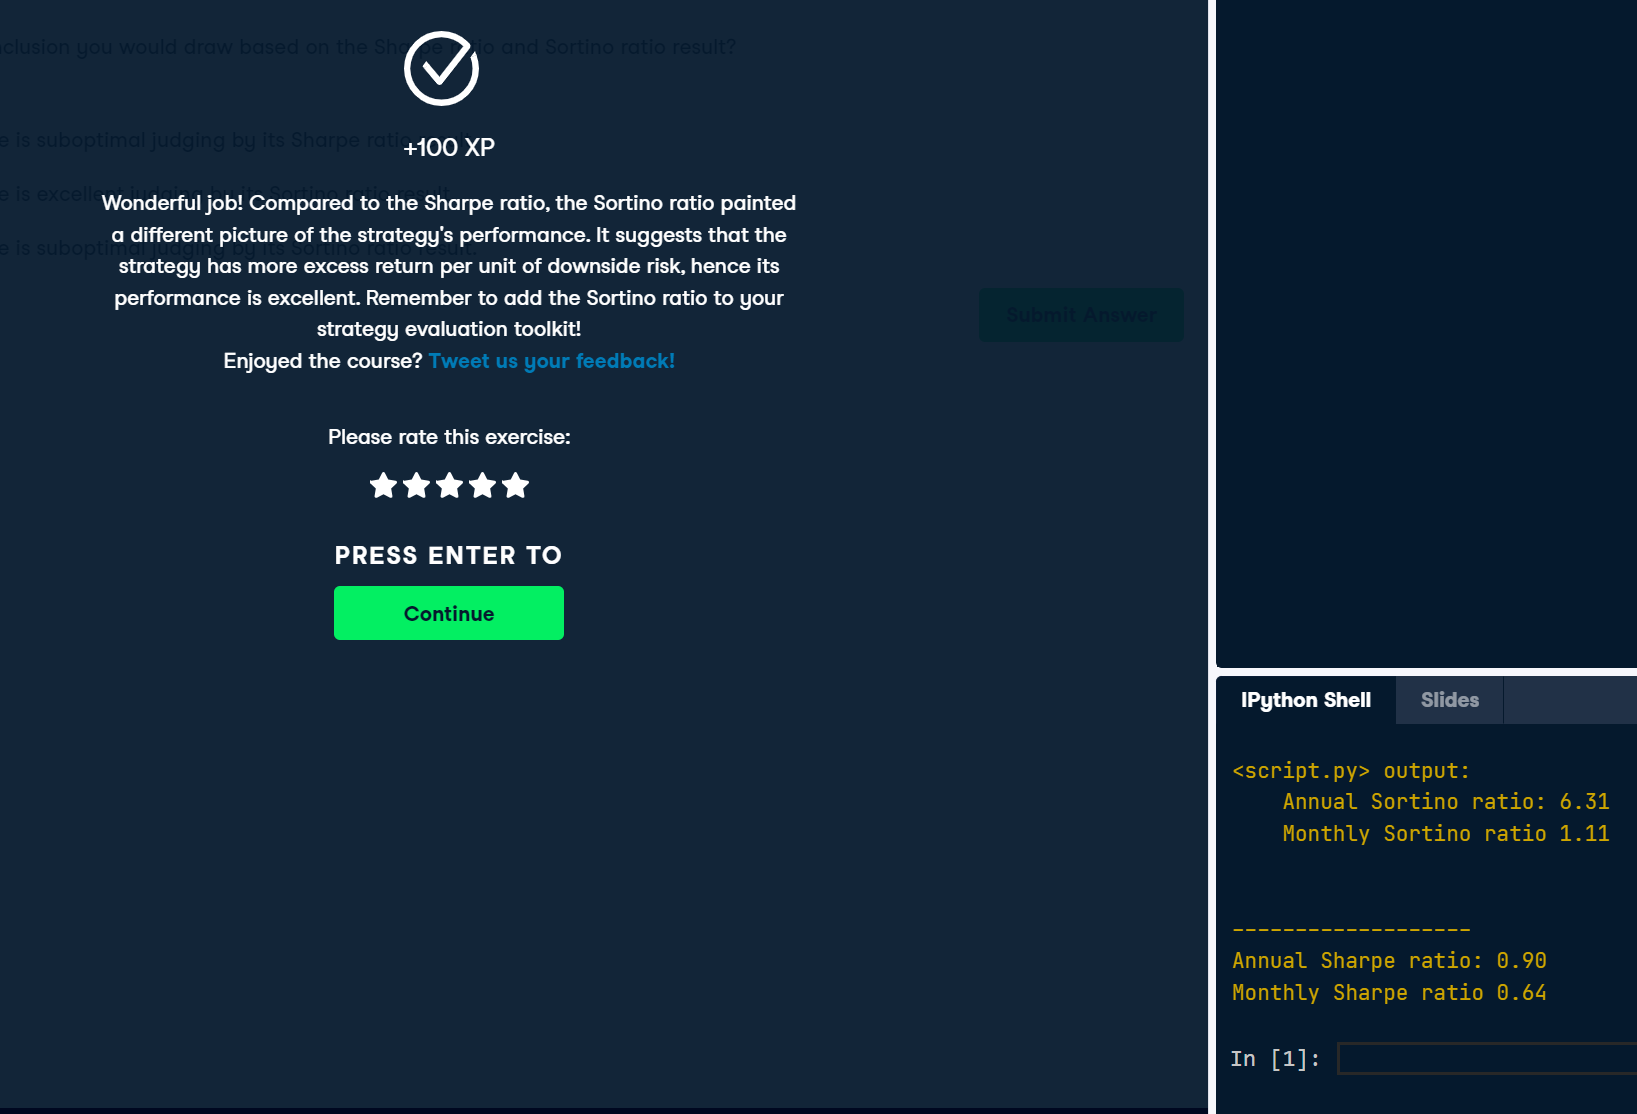